* importing packages

In [1]:
from numpy import linspace, pi
from matplotlib.pyplot import show, figure
from matplotlib import rcParams
from magpylib.source.magnet import Cylinder
from magpylib import Collection, displaySystem

from magforce import plot_1D_along_x, plot_1D_along_y, plot_1D_along_z
from magforce import plot_2D_plane_x, plot_2D_plane_y, plot_2D_plane_z
from magforce import plot_3D
from magforce import getF

* setting up figure size for notebook

In [2]:
# make figures bigger on notebook
width = 9
height = 9
rcParams['figure.figsize'] = [width, height]

* defining a cobalt spherical sample, with 4mm diameter, Ms of 1.4e6 A/m and demagnetizing factor of 1/3

* the sample variable needs to be a dictionary for magforce's functions to work, and it must include the 'demagnetizing_factor', 'volume' and 'M_saturation' keys

In [3]:
demagnetizing_factor = 1/3             # sphere
volume = 4 / 3 * pi * (4 / 1000) ** 3  # V sphere r=4mm [m3]
M_saturation = 1.400e6                 # Ms Co room temperature [A/m]

sample = {'demagnetizing_factor': demagnetizing_factor, 
          'volume': volume, 
          'M_saturation': M_saturation}

* defining diferent magnets

* couronne_10_20_50
    * mag 1300mT
    * 10mm diametre interne
    * 20mm diametre externe
    * 50mm hauteur
    * suface du bas a z=25

In [4]:
couronne_10_20_50_out = Cylinder(mag=[0, 0, 1300], 
                                 dim=[20, 50], 
                                 pos=[0, 0, 50])

couronne_10_20_50_in = Cylinder(mag=[0, 0, -1300], 
                                dim=[10, 50], 
                                pos=[0, 0, 50])

couronne_10_20_50 = Collection(couronne_10_20_50_out, couronne_10_20_50_in)

* 4 aimants diagonal

In [5]:
m1 = Cylinder(mag = [0, 0, 1300],
              dim = [20, 50],
              pos = [50, 0, 0],
              angle = 90,
              axis = [0, 1, 0])

m2 = Cylinder(mag = [0, 0, 1300],
              dim = [20, 50],
              pos = [50, 0, 0],
              angle = 90,
              axis = [0, 1, 0])

m3 = Cylinder(mag = [0, 0, 1300],
              dim = [20, 50],
              pos = [50, 0, 0],
              angle = 90,
              axis = [0, 1, 0])

m4 = Cylinder(mag = [0, 0, 1300],
              dim = [20, 50],
              pos = [50, 0, 0],
              angle = 90,
              axis = [0, 1, 0])

m1.rotate(angle = 315,
          axis = [0, 1, 0],
          anchor = [0, 0, 0])

m2.rotate(angle = 90,
          axis = [0, 0, 1],
          anchor = [0, 0, 0])

m2.rotate(angle = 45,
          axis = [1, 0, 0],
          anchor = [0, 0, 0])

m3.rotate(angle = 180,
          axis = [0, 0, 1],
          anchor = [0, 0, 0])

m3.rotate(angle = 45,
          axis = [0, 1, 0],
          anchor = [0, 0, 0])

m4.rotate(angle = 270,
          axis = [0, 0, 1],
          anchor = [0, 0, 0])

m4.rotate(angle = 315,
          axis = [1, 0, 0],
          anchor = [0, 0, 0])

dh = Collection(m1, m2, m3, m4)


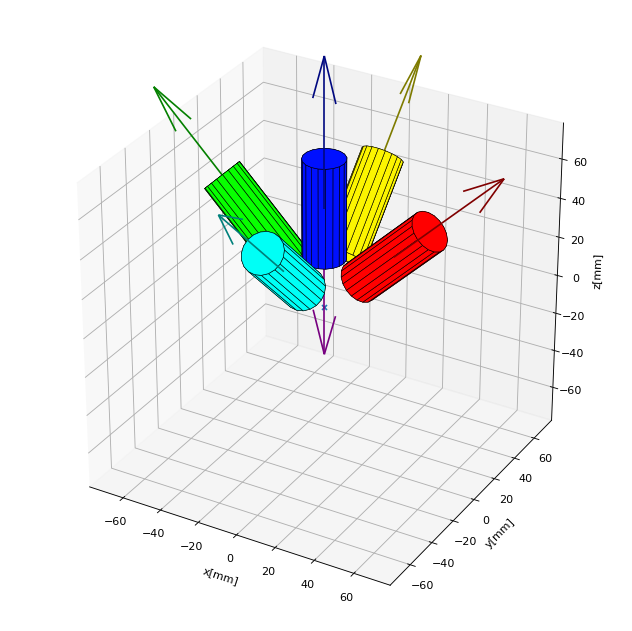

In [6]:
cou_4h = Collection(dh, couronne_10_20_50)
displaySystem(cou_4h, direc=True)

* etude dans l'axe

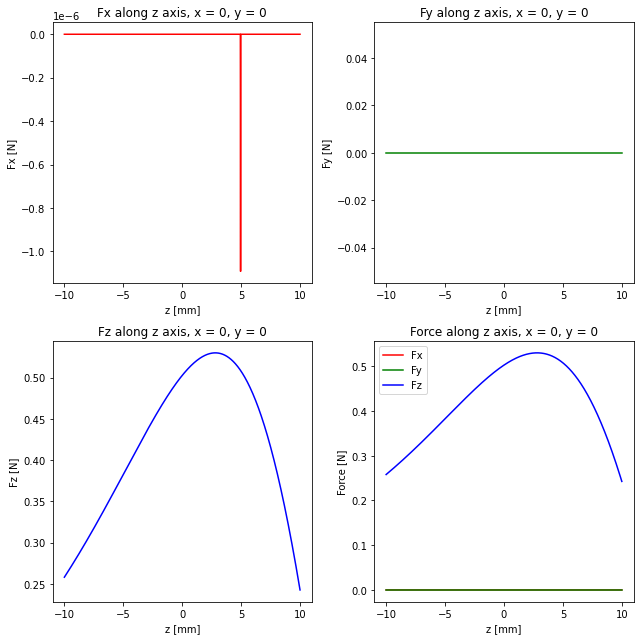

In [7]:
# plot for couronne + 4 aimants em diagonal en haut; dans l'axe
plot_1D_along_z(x = 0, 
                y = 0, 
                zs = linspace(-10, 10, 1000), 
                collection = cou_4h, 
                sample = sample, 
                BF = 'F', 
                saveCSV = False)

* etude hors l'axe (2mm en x 2mm en y)

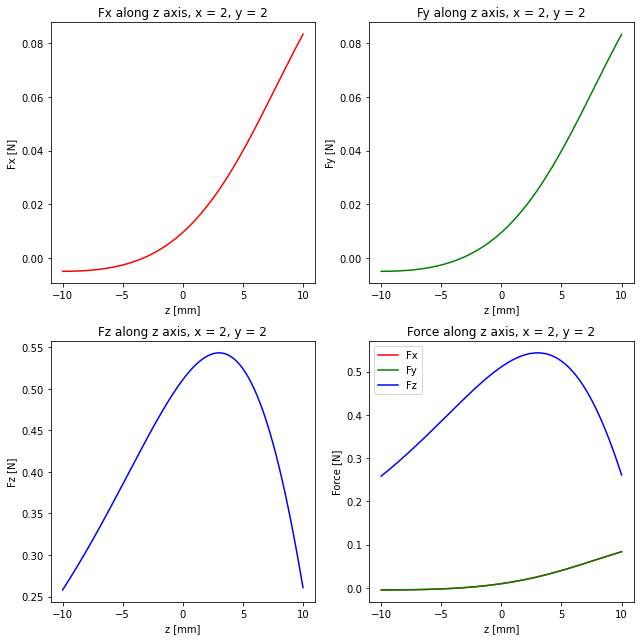

In [8]:
# plot for couronne + 4 aimants em diagonal en haut; hors l'axe
plot_1D_along_z(x = 2, 
                y = 2, 
                zs = linspace(-10, 10, 1000), 
                collection = cou_4h, 
                sample = sample, 
                BF = 'F', 
                saveCSV = False)